Imports

In [1]:
from tensorflow.keras import layers, models  
import numpy as np
import matplotlib.pyplot as plt           
import cv2 as cv 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
import seaborn as sn
from sklearn.utils import shuffle 

Classes

In [2]:
class_names = ['card', 'glass', 'metal', 'paper', 'plastic']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

new_size = (71,71)

Carregar dataset e baralha-los

In [3]:
test_images = np.load('arraysTrainTest/test_images71.npy')
test_labels = np.load('arraysTrainTest/test_labels71.npy')

Carregar modelo 

In [4]:
model = models.load_model('RandomizedSearch.model')
model.summary()

try:
    dropout_rate = model.layers[3].rate #no geral a camada de dropout esta neste index, em um ou outro modelo esta no index 2
    print(f'Dropout Rate: {dropout_rate}')
except AttributeError:
    dropout_rate = model.layers[2].rate 
    print(f'Dropout Rate: {dropout_rate}')

try:
    learning_rate = model.optimizer.lr.numpy()
    print(f'Learning Rate: {learning_rate}')
except AttributeError:
    print('Learning rate default (0.001)')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 44: invalid start byte

Carregar o fit e mostrar o grafico de accuracy de treino e validação

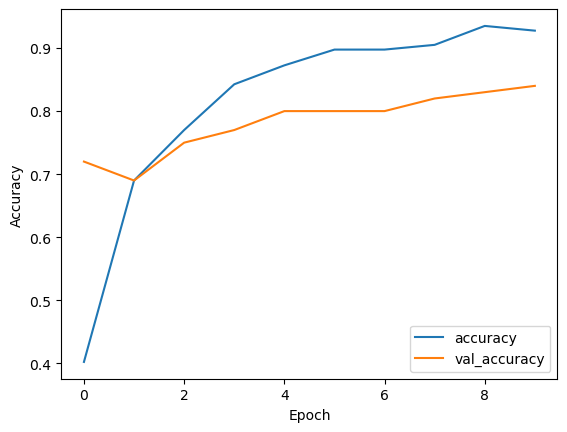

In [20]:
history = np.load('arraysHistory/history_RandomizedSearch.npy', allow_pickle='TRUE').item()
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
#plt.savefig('teste.jpg')
plt.show()

Matriz confusão

4/4 [==============================] - 5s 308ms/step


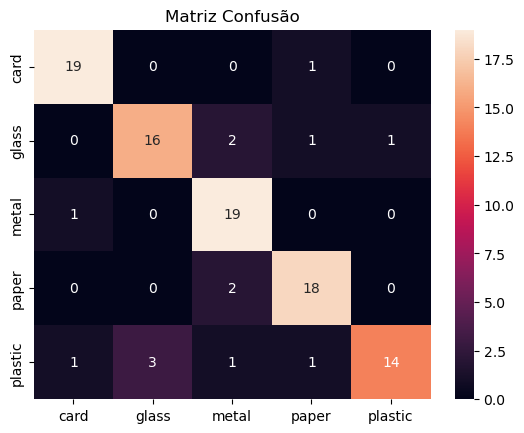

In [21]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
CM = confusion_matrix(test_labels, predicted_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
            annot_kws={"size": 10}, 
            xticklabels=class_names, 
            yticklabels=class_names, ax = ax)
ax.set_title('Matriz Confusão')
#plt.savefig('teste.jpg')
plt.show()


Performance

In [22]:
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f_measure = f1_score(test_labels, predicted_labels, average='weighted')
auc = roc_auc_score(test_labels, predictions, multi_class='ovr', average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-Measure: {f_measure}")
print(f"AUC: {auc}")

Accuracy: 0.86
Precision: 0.8658020050125314
Recall: 0.86
F-Measure: 0.8578054465859343
AUC: 0.97475


Testes personalizados

1/1 [==============================] - 0s 69ms/step
I am 99.72% sure it is plastic


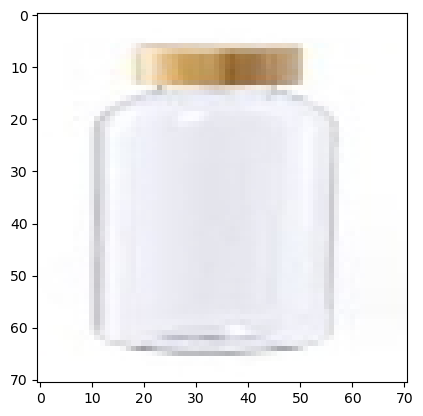

In [16]:
img = cv.imread('imagensTeste/plasticoTeste2.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, new_size)

plt.imshow(img, cmap=plt.cm.binary)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
confidence = prediction[0][index] * 100

print(f"I am {confidence:.2f}% sure it is {class_names[index]}")